In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
from plotly.plotly import plot_mpl
import cufflinks as cf
import statsmodels.api as sm
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/Users/fionasu/Downloads/Zillow Single Family Residence.csv')

In [4]:
df

,Unnamed: 0,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.0,335400.0,...,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,...,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.0,500900.0,...,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.0,77300.0,...,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.0,95600.0,...,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700
5,5,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,6,95000.0,95200.0,...,163600,164800,165500,166200,167300,168600,169500,170700,172300,173600
6,6,61807,10467,New York,NY,New York-Newark-Jersey City,Bronx County,7,152900.0,152700.0,...,416600,420400,422800,425900,430100,433700,434500,435500,439100,443100
7,7,84640,60640,Chicago,IL,Chicago-Naperville-Elgin,Cook County,8,216500.0,216700.0,...,785100,787700,788500,778400,763500,758400,756500,749000,744600,749200
8,8,62037,11226,New York,NY,New York-Newark-Jersey City,Kings County,9,162000.0,162300.0,...,942500,969000,995600,1024700,1059600,1090700,1111800,1122700,1114600,1100500
9,9,97564,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,10,766000.0,771100.0,...,3761200,3810600,3876700,3942300,3982900,3993000,3999000,4014600,4009500,4016600


In [5]:
df=df.dropna()

# US National Housing Price Prediction

In [6]:
df_price=df.loc[:,'1996-04':'2018-12']
df_price.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,...,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,...,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,...,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,...,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,...,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


In [7]:
national_price=pd.DataFrame(df_price.mean(),columns=['Avg Price'])
national_price.index.names = ['Date']
national_price.head()

,Avg Price
Date,
1996-04,119843.979176
1996-05,119964.886072
1996-06,120083.967104
1996-07,120200.022635
1996-08,120327.735023


In [8]:
national_price.reset_index(inplace = True)

In [16]:
a = national_price['Date']
b = pd.to_datetime(a)
us_price = pd.DataFrame(df_price.mean(),index=b,columns=['Avg_Price'])
us_price.head()
type(b)

pandas.core.series.Series

In [15]:
us_price_trend = us_price.copy().round(2)
us_price_trend.tail()

,Avg_Price
Date,
2018-08-01,303017.07
2018-09-01,304232.10
2018-10-01,305623.28
2018-11-01,306889.11
2018-12-01,307909.64


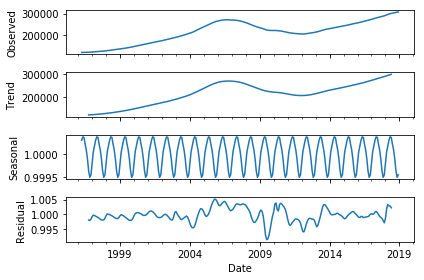

In [11]:
#Decomposition makes the trend and seasonality become obvious
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(us_price_trend,model='multiplicative')
fig = result.plot()
rcParams['figure.figsize'] = 7,7

In [90]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
pt=us_price_trend['Avg_Price']

In [91]:
from pmdarima.arima import auto_arima

In [92]:
#based on AIC, the lowest AIC goes to the optimal p,d,q for better fit the model.
stepwise_model = auto_arima(us_price_trend, start_p=0, start_q=0,
                           max_p=10, max_q=10, 
                           m=12,
                           start_P=0, start_Q=0, 
                           seasonal=True,
                           max_P=10,max_Q=10,
                           #d=1, D=1, 
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
#the best combination is SARIMAX(2, 2, 2)x(0, 0, 0, 12)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=3526.496, BIC=3533.700, Fit time=0.023 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=3499.300, BIC=3513.709, Fit time=0.198 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=3483.812, BIC=3498.221, Fit time=0.172 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 0, 1, 12); AIC=3485.196, BIC=3503.206, Fit time=0.485 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=3481.976, BIC=3492.782, Fit time=0.097 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=3481.281, BIC=3495.690, Fit time=0.232 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=3497.474, BIC=3508.280, Fit time=0.110 seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 0, 0, 12); AIC=3482.608, BIC=3500.619, Fit time=0.240 seconds
Fit ARIMA: order=(2, 2, 2) seasonal_order=(0, 0, 0, 12); AIC=3448.297, BIC=3469.910, Fit time=0.447 seconds
Fit ARIMA: order=(2, 2, 2) s

In [93]:
model = sm.tsa.statespace.SARIMAX(us_price_trend,
                                 order=(2,2,2), 
                                 seasonal_order=(0,0,0,12),   
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
result = model.fit()
print(result.summary())
#The P>|z| column informs us of the significance of each feature weight. 
#Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model

                           Statespace Model Results                           
Dep. Variable:              Avg_Price   No. Observations:                  273
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1650.993
Date:                Mon, 11 Mar 2019   AIC                           3311.985
Time:                        16:31:01   BIC                           3329.940
Sample:                    04-01-1996   HQIC                          3319.197
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5751      0.020    -28.837      0.000      -0.614      -0.536
ar.L2         -0.0158      0.005     -2.946      0.003      -0.026      -0.005
ma.L1          1.7219      0.024     72.475      0.0

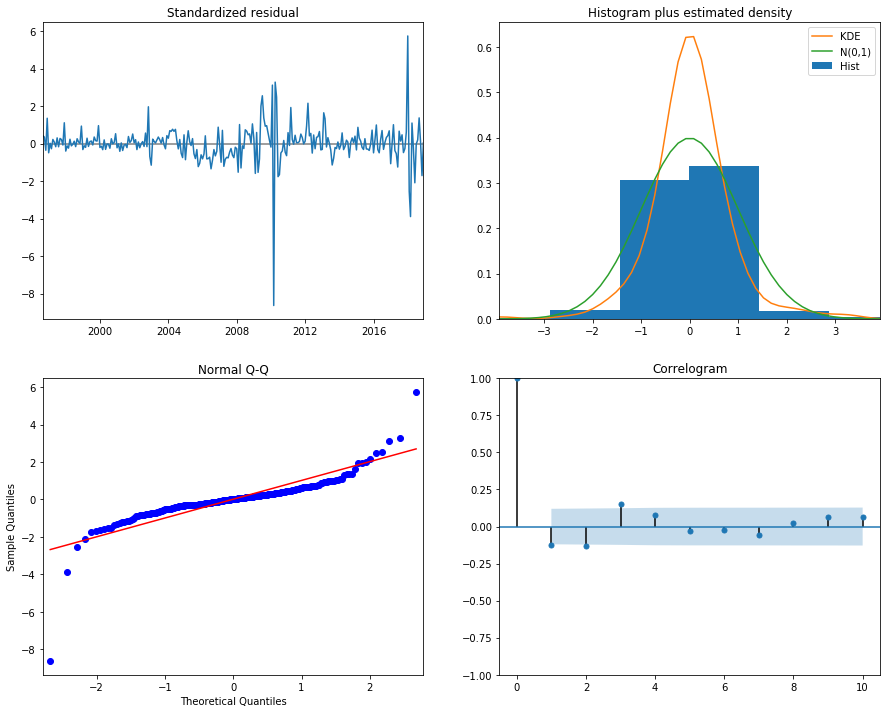

In [94]:
result.plot_diagnostics(figsize=(15, 12))
plt.show()
#In the top right plot, we see that the KDE line follows closely with the N(0,1) line 
#(where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). 
#This is a good indication that the residuals are normally distributed.
#The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows
#the linear trend of the samples taken from a standard normal distribution with N(0, 1). 
#Again, this is a strong indication that the residuals are normally distributed.
#The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. 
#This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that 
#the time series residuals have low correlation with lagged versions of itself.

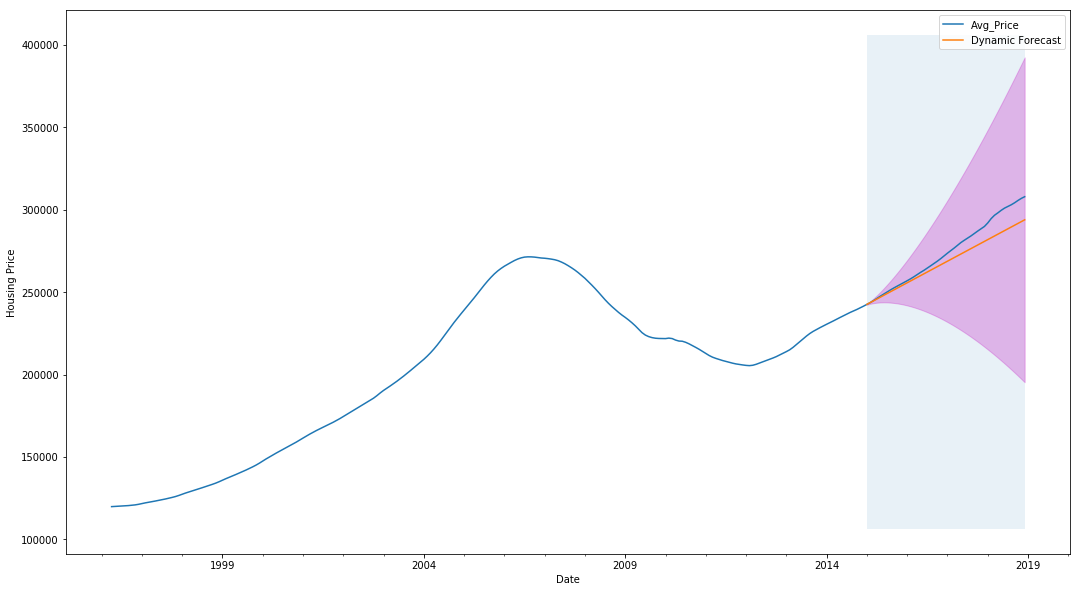

In [95]:
pred_dynamic = result.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True,full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = us_price_trend['1996-04-01':].plot(label='Observed', figsize=(18, 10))
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast')

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='m', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), 
                  pd.to_datetime('2015-01-01'), 
                  us_price_trend.index[-1],
                  alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')
plt.legend()
plt.show()

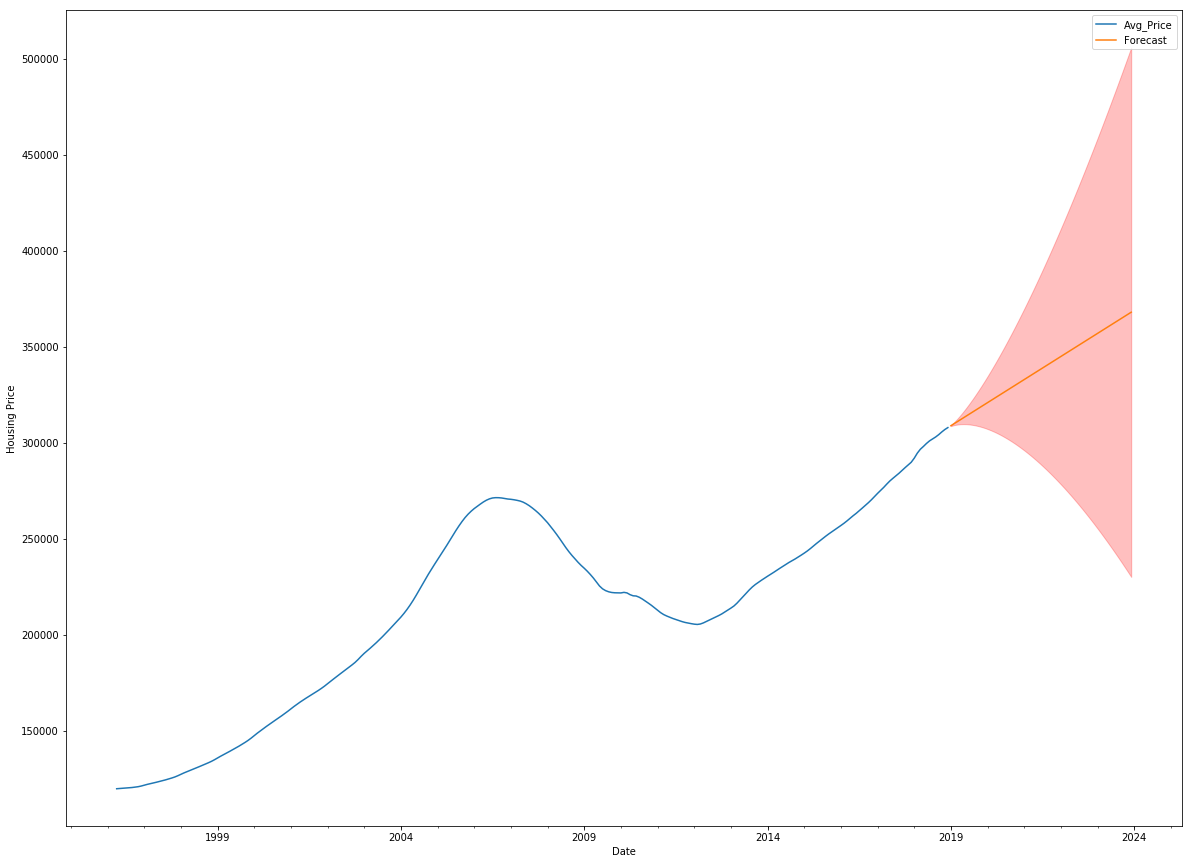

In [96]:
# Get forecast 500 steps ahead in future
pred_uc = result.get_forecast(steps=60)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

# Use the output to plot the time series and forecasts of its future values.
ax = us_price_trend.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')

plt.legend()
plt.show()

# California Housing Price Prediction

In [97]:
state_price=df.drop(['RegionID','RegionName','City','Metro','CountyName','SizeRank','Unnamed: 0'],axis=1)
CA_price=state_price[state_price['State']=='CA']
ca=CA_price.drop(['State'],axis=1)
ca.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
9,766000.0,771100.0,776500.0,781900.0,787300.0,793000.0,799100.0,805800.0,814400.0,824300.0,...,3761200,3810600,3876700,3942300,3982900,3993000,3999000,4014600,4009500,4016600
16,152500.0,152600.0,152600.0,152600.0,152600.0,152600.0,152600.0,152700.0,153000.0,153400.0,...,611600,614200,617300,621000,625700,631100,636600,642800,648400,652100
29,139200.0,138300.0,137500.0,136600.0,135600.0,134700.0,133800.0,133100.0,132600.0,132300.0,...,417700,421600,425900,429100,430200,429400,429400,428600,426100,423700
32,340600.0,341700.0,343000.0,344400.0,346100.0,348000.0,350300.0,353000.0,356400.0,360400.0,...,1932400,1935400,1941500,1948700,1938000,1916500,1899600,1894800,1892600,1893500
70,222400.0,222300.0,222400.0,222600.0,223000.0,223600.0,224500.0,225700.0,227400.0,229400.0,...,1039900,1042000,1038100,1030700,1023200,1015500,1010400,1013200,1020000,1027600


In [98]:
ca_price=pd.DataFrame(ca.mean(),columns=['Avg Price'])
ca_price.index.names = ['Date']
ca_price.head()

,Avg Price
Date,
1996-04,202218.993929
1996-05,202129.488291
1996-06,202049.002602
1996-07,201987.510841
1996-08,201991.673894


In [99]:
ca_price.reset_index(inplace = True)

In [100]:
d = ca_price['Date']
e = pd.to_datetime(d)
ca_price = pd.DataFrame(ca.mean(),index=e,columns=['Avg_Price'])
ca_price.head()

,Avg_Price
Date,
1996-04-01,202218.993929
1996-05-01,202129.488291
1996-06-01,202049.002602
1996-07-01,201987.510841
1996-08-01,201991.673894


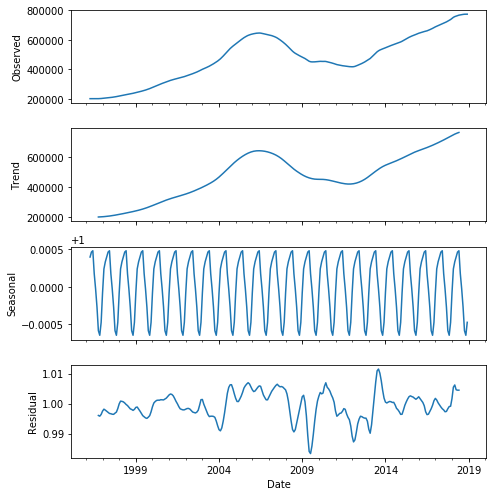

In [101]:
#Decomposition makes the trend and seasonality become obvious
result = seasonal_decompose(ca_price,model='multiplicative')
fig = result.plot()
rcParams['figure.figsize'] = 7,7

In [102]:
#based on AIC, the lowest AIC goes to the optimal p,d,q for better fit the model.
stepwise_model = auto_arima(ca_price, start_p=0, start_q=0,
                           max_p=10, max_q=10, 
                           m=12,
                           start_P=0, start_Q=0, 
                           seasonal=True,
                           max_P=10,max_Q=10,
                           d=1, D=1, 
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
#the best combination is SARIMAX(2, 1, 1)x(0, 1, 0, 12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4967.144, BIC=4974.265, Fit time=0.028 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4950.066, BIC=4964.309, Fit time=0.810 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4948.059, BIC=4958.741, Fit time=0.150 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4932.721, BIC=4946.964, Fit time=0.345 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=4911.144, BIC=4928.948, Fit time=0.481 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=7095.519, BIC=7120.443, Fit time=0.856 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=491

In [103]:
model = sm.tsa.statespace.SARIMAX(ca_price,
                                 order=(2,1,1), 
                                 seasonal_order=(0,1,0,12),   
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
result = model.fit()
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Avg_Price   No. Observations:                  273
Model:             SARIMAX(2, 1, 1)x(0, 1, 0, 12)   Log Likelihood               -2015.293
Date:                            Mon, 11 Mar 2019   AIC                           4038.586
Time:                                    16:31:27   BIC                           4052.797
Sample:                                04-01-1996   HQIC                          4044.300
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5491      0.040     38.827      0.000       1.471       1.627
ar.L2         -0.5889      0.037   

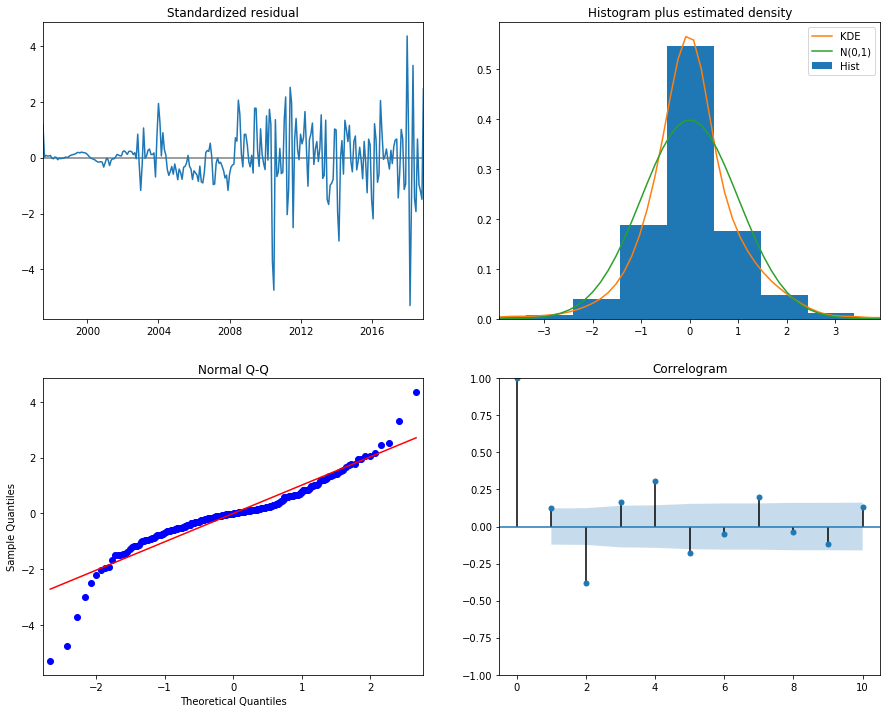

In [104]:
result.plot_diagnostics(figsize=(15, 12))
plt.show()

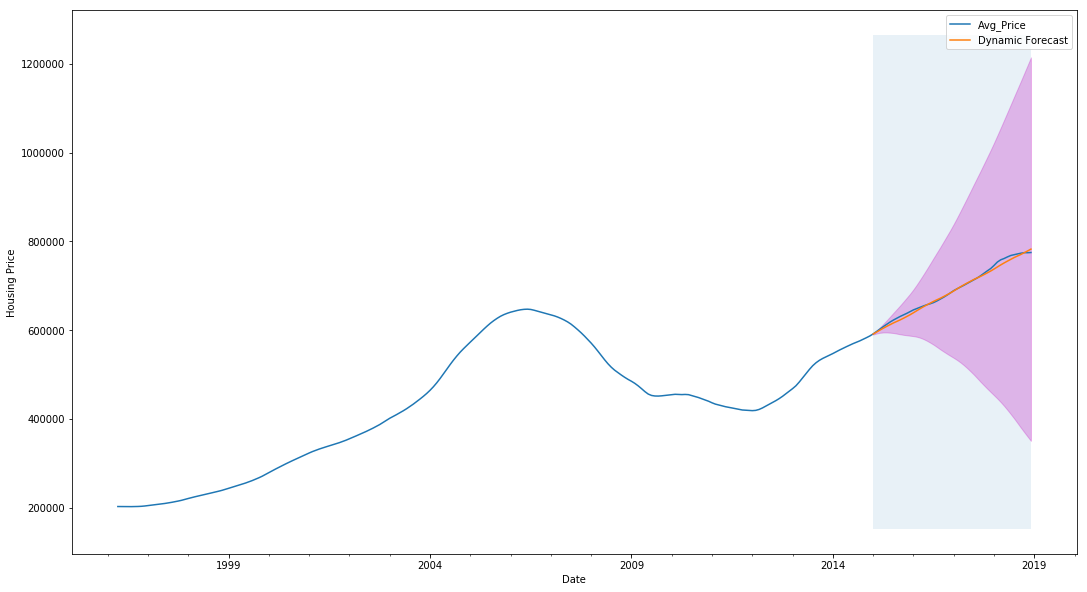

In [105]:
pred_dynamic = result.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True,full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = ca_price['1996-04-01':].plot(label='Observed', figsize=(18, 10))
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast')

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='m', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), 
                  pd.to_datetime('2015-01-01'), 
                  ca_price.index[-1],
                  alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')
plt.legend()
plt.show()

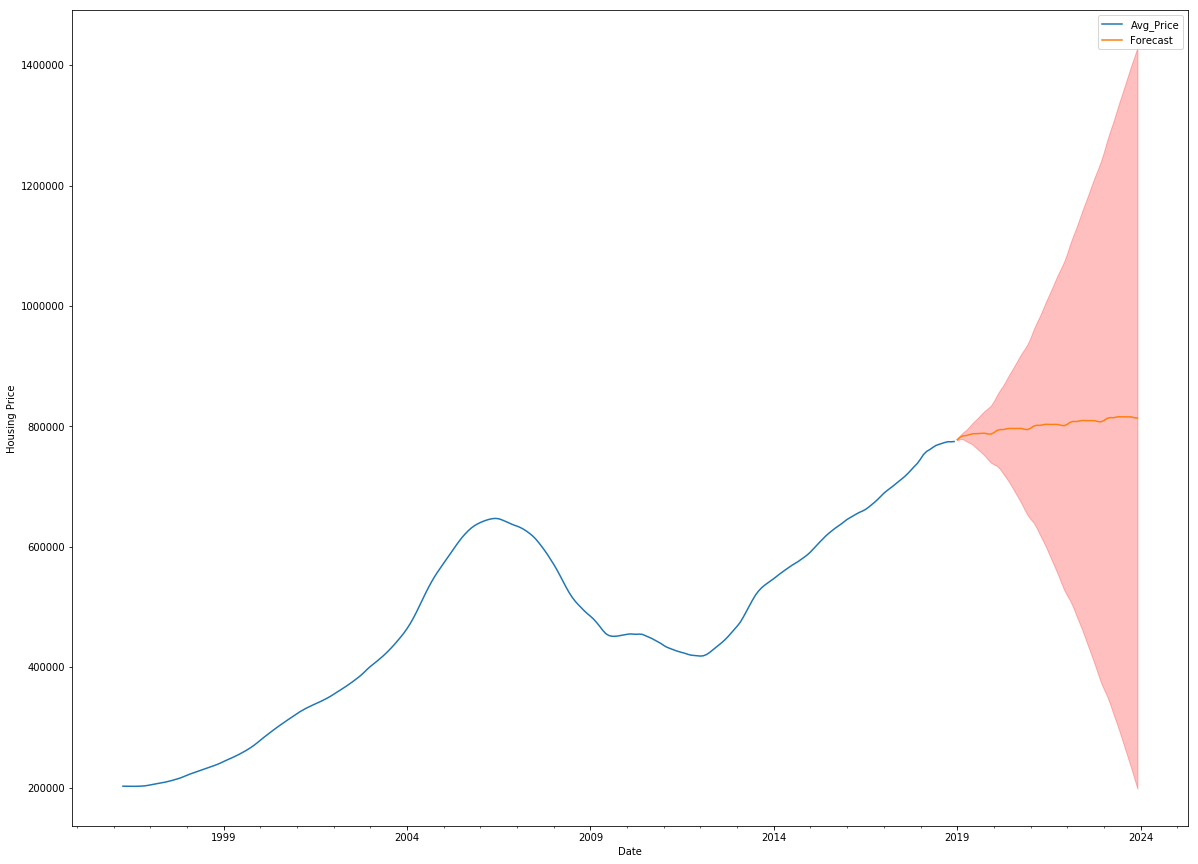

In [106]:
# Get forecast 60 steps ahead in future
pred_uc = result.get_forecast(steps=60)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

# Use the output to plot the time series and forecasts of its future values.
ax = ca_price.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')

plt.legend()
plt.show()

# Irvine Housing Price Prediction

In [107]:
city_price=df.drop(['RegionID','RegionName','State','Metro','CountyName','SizeRank','Unnamed: 0'],axis=1)
irvine_price=city_price[city_price['City']=='Irvine']
irvine=irvine_price.drop(['City'],axis=1)
irvine

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
467,282200.0,281400.0,280700.0,280000.0,279500.0,279100.0,279000.0,279100.0,279500.0,280200.0,...,1040100,1042600,1044600,1047300,1053100,1062400,1066200,1067600,1070400,1074500
712,320600.0,321100.0,321600.0,322200.0,322900.0,323700.0,324800.0,326000.0,327600.0,329500.0,...,1309900,1314200,1326000,1340300,1348400,1352200,1347000,1338600,1334900,1338200
2559,220800.0,221600.0,222300.0,223100.0,224000.0,224900.0,225900.0,227100.0,228400.0,229900.0,...,844700,844600,846300,849900,854000,855900,852400,847600,846100,848800
3845,276100.0,275500.0,275000.0,274600.0,274300.0,274100.0,274100.0,274300.0,274900.0,275600.0,...,947000,951000,955000,959100,963200,968400,971500,971100,970400,972800
3946,307300.0,306700.0,306200.0,305600.0,305200.0,304900.0,304800.0,305000.0,305600.0,306500.0,...,1131900,1140100,1147500,1151200,1155900,1164500,1167800,1167600,1167400,1169300
4536,233000.0,232600.0,232300.0,232100.0,232100.0,232300.0,232600.0,233200.0,234100.0,235100.0,...,878400,878600,881000,884000,886200,889100,888000,884400,882600,884000
5435,260000.0,259400.0,258900.0,258400.0,258100.0,257900.0,257800.0,257900.0,258300.0,258900.0,...,910000,909700,910900,914100,918300,923400,925800,928100,932200,936700
5883,510900.0,509200.0,507700.0,506200.0,504900.0,503800.0,503000.0,502700.0,503100.0,504300.0,...,1817000,1828500,1846700,1864600,1880900,1897600,1899000,1888500,1882800,1887300


In [108]:
irvine_price=pd.DataFrame(irvine.mean(),columns=['Avg Price'])
irvine_price.index.names = ['Date']
irvine_price.head()

,Avg Price
Date,
1996-04,301362.5
1996-05,300937.5
1996-06,300587.5
1996-07,300275.0
1996-08,300125.0


In [109]:
irvine_price.reset_index(inplace = True)

In [110]:
f = irvine_price['Date']
g = pd.to_datetime(f)
irvine_price = pd.DataFrame(irvine.mean(),index=g,columns=['Avg_Price'])
irvine_price.head()

,Avg_Price
Date,
1996-04-01,301362.5
1996-05-01,300937.5
1996-06-01,300587.5
1996-07-01,300275.0
1996-08-01,300125.0


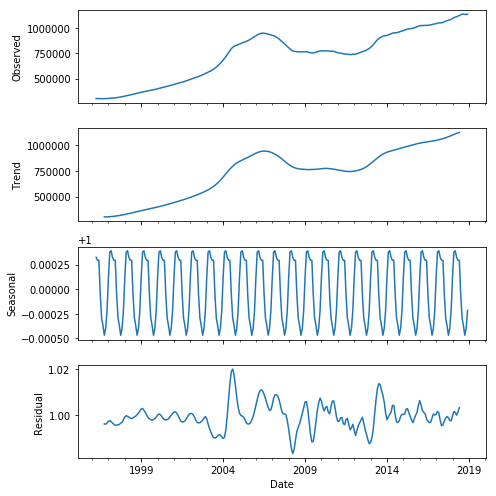

In [111]:
#Decomposition makes the trend and seasonality become obvious
result = seasonal_decompose(irvine_price,model='multiplicative')
fig = result.plot()
rcParams['figure.figsize'] = 7,7

In [112]:
#based on AIC, the lowest AIC goes to the optimal p,d,q for better fit the model.
stepwise_model = auto_arima(irvine_price, start_p=0, start_q=0,
                           max_p=1, max_q=1, 
                           m=12,
                           start_P=0, start_Q=0, 
                           seasonal=True,
                           max_P=1,max_Q=1,
                           d=2, D=2, 
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
#the best combination is SARIMAX(0, 2, 0)x(1, 2, 1, 12)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 0, 12); AIC=4742.243, BIC=4749.261, Fit time=0.063 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 0, 12); AIC=4736.393, BIC=4750.431, Fit time=0.513 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 2, 0, 12); AIC=4743.679, BIC=4754.208, Fit time=0.146 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 1, 12); AIC=4579.166, BIC=4596.713, Fit time=2.148 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 2, 1, 12); AIC=4569.200, BIC=4583.237, Fit time=1.986 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 1, 12); AIC=4570.271, BIC=4587.818, Fit time=3.038 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 2, 1, 12); AIC=4573.164, BIC=4594.220, Fit time=2.349 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 2, 0, 

In [113]:
model = sm.tsa.statespace.SARIMAX(irvine_price,
                                 order=(0,2,0), 
                                 seasonal_order=(1,2,1,12),   
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
result = model.fit()
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Avg_Price   No. Observations:                  273
Model:             SARIMAX(0, 2, 0)x(1, 2, 1, 12)   Log Likelihood               -2164.586
Date:                            Mon, 11 Mar 2019   AIC                           4335.172
Time:                                    16:32:00   BIC                           4345.538
Sample:                                04-01-1996   HQIC                          4339.351
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1707      0.037     -4.583      0.000      -0.244      -0.098
ma.S.L12      -0.7905      0.014   

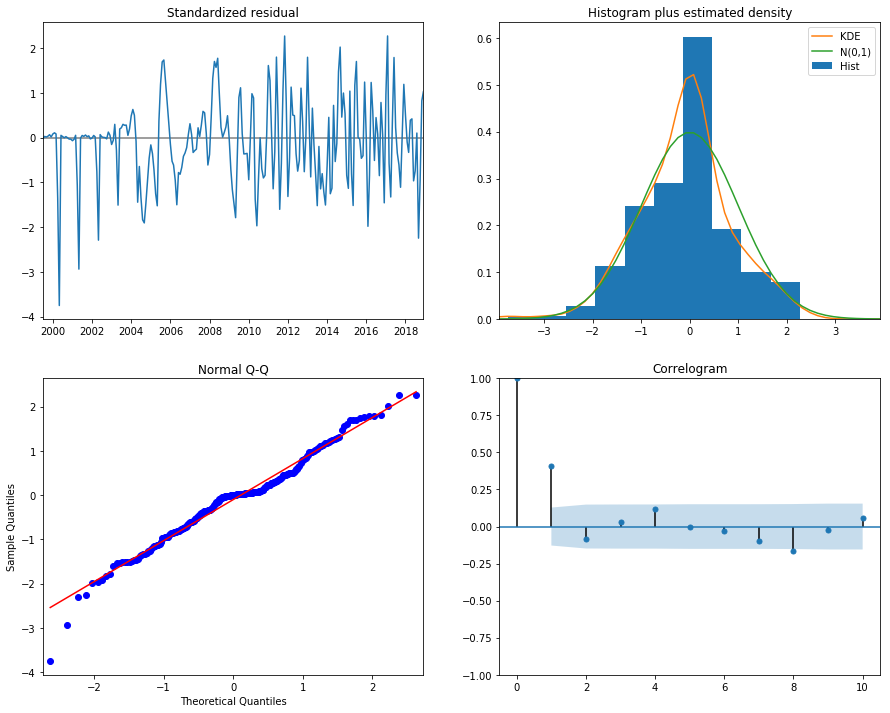

In [114]:
result.plot_diagnostics(figsize=(15, 12))
plt.show()

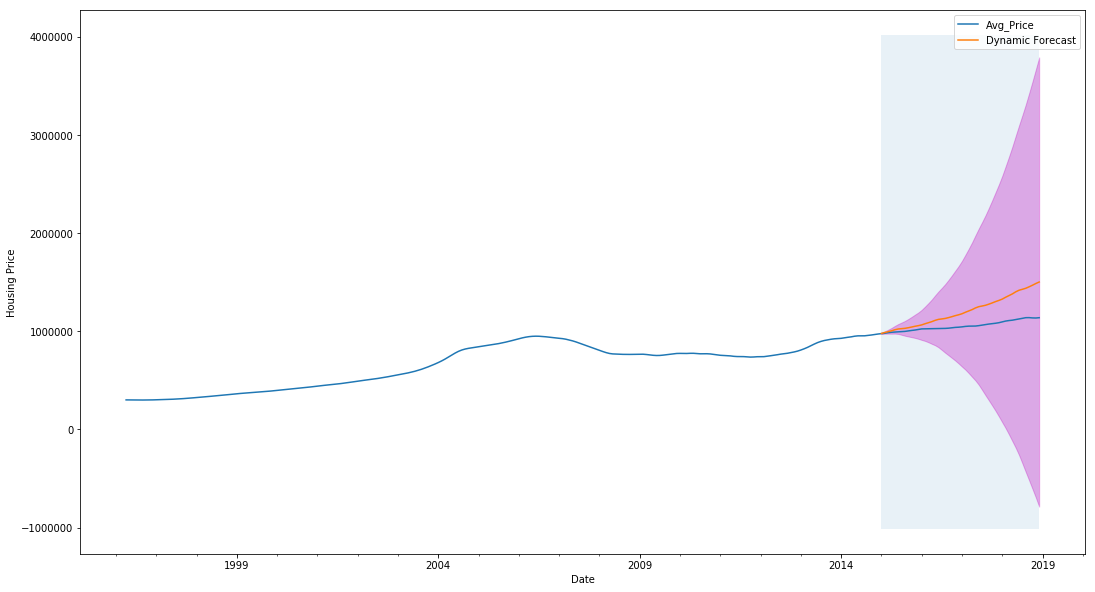

In [115]:
pred_dynamic = result.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True,full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = irvine_price['1996-04-01':].plot(label='Observed', figsize=(18, 10))
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast')

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='m', alpha=.3)
ax.fill_betweenx(ax.get_ylim(), 
                  pd.to_datetime('2015-01-01'), 
                  irvine_price.index[-1],
                  alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')
plt.legend()
plt.show()

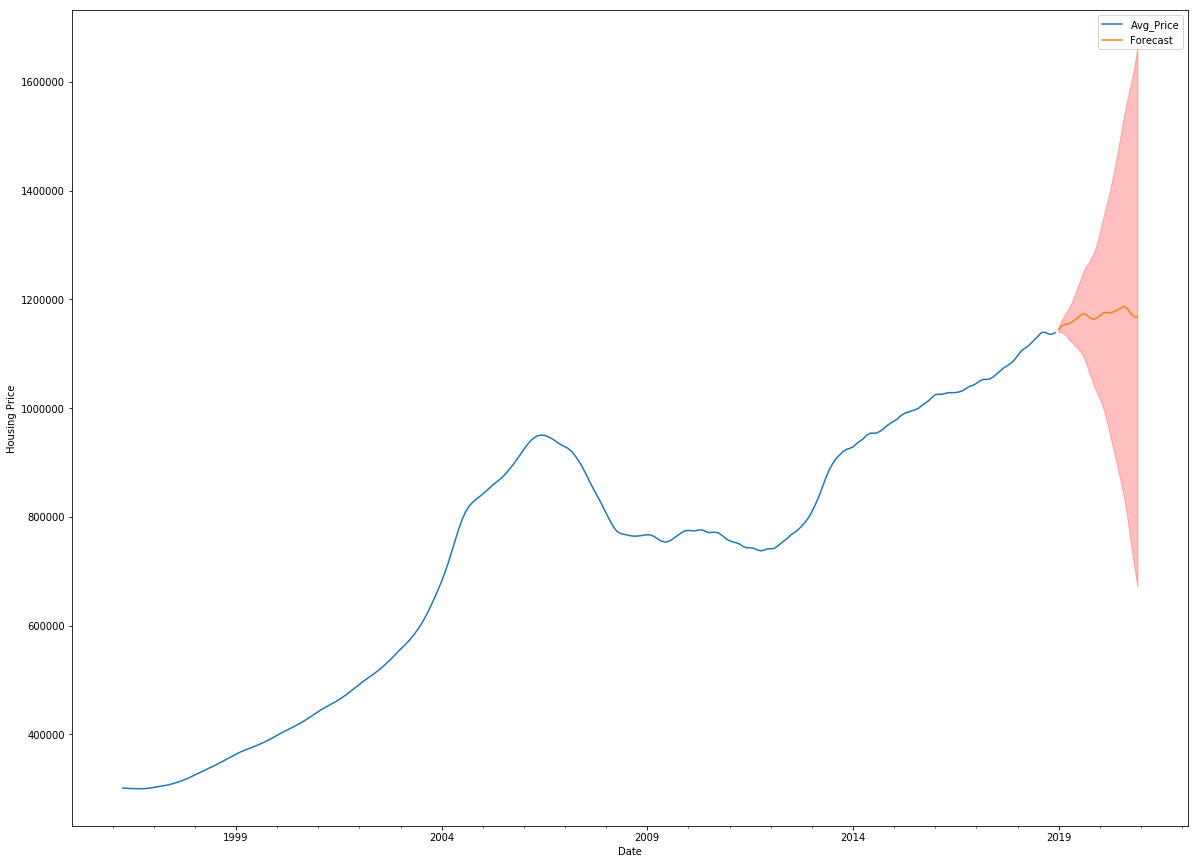

In [182]:
# Get forecast 60 steps ahead in future
pred_uc = result.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

# Use the output to plot the time series and forecasts of its future values.
ax = irvine_price.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Housing Price')

plt.legend()
plt.show()

In [119]:
import plotly 
plotly.tools.set_credentials_file(username='xinrsu1206', api_key='ddMhDWvoWNzagELCqwAi')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.plotly import plot_mpl
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from pylab import rcParams
from pandas.tools.plotting import autocorrelation_plot

In [120]:
df_state = df.copy()

In [126]:
df_usa=df_price.transpose()
df_state['row_mean'] = df_usa.mean(axis=0) 
df_state.head()

,Unnamed: 0,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,row_mean
0,0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.0,335400.0,...,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900,753125.641026
1,1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,...,332700,334500,335900,337000,338300,338400,336900,336000,336500,264351.648352
2,2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.0,500900.0,...,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300,984821.611722
3,3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.0,77300.0,...,121300,122200,123000,123600,124500,125600,126300,126800,127400,102547.252747
4,4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.0,95600.0,...,176400,176900,176900,177300,178000,178500,179300,180200,180700,128052.380952


In [127]:
df_state_price = df_state[['State', 'row_mean']]
df_state_avg_price = df_state_price.groupby(['State'], as_index=False).mean()
df_state_avg_price = df_state_avg_price.rename(columns={'State': 'Code', 'row_mean': 'State Housing Price'})
df_state_avg_price['State Housing Price'] = df_state_avg_price['State Housing Price'].round(2)
df_state_avg_price.head()

,Code,State Housing Price
0,AK,251819.91
1,AL,127131.74
2,AR,109508.90
3,AZ,204791.24
4,CA,474905.63


In [128]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [129]:
us_state_code = pd.DataFrame.from_dict(us_state_abbrev, orient='index')
us_state_code = us_state_code.reset_index()
us_state_code = us_state_code.rename(columns={'index': 'State', 0: 'Code'})
df_state_avg_price = df_state_avg_price.merge(us_state_code, on='Code', how='inner')
df_state_avg_price['Description'] = df_state_avg_price['State'].map(str) + '-' + df_state_avg_price['State Housing Price'].map(str)
df_state_avg_price.head()

,Code,State Housing Price,State,Description
0,AK,251819.91,Alaska,Alaska-251819.91
1,AL,127131.74,Alabama,Alabama-127131.74
2,AR,109508.90,Arkansas,Arkansas-109508.9
3,AZ,204791.24,Arizona,Arizona-204791.24
4,CA,474905.63,California,California-474905.63


In [175]:
data = dict(type = 'choropleth', 
            colorscale = 'Viridis', 
            locations = df_state_avg_price['Code'], 
            z = df_state_avg_price['State Housing Price'], 
            locationmode = 'USA-states', 
            text = df_state_avg_price['Description'], 
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2)),
            colorbar = {'title':"Housing Price"}
           )

layout = dict(title = 'The USA Housing Price',
              geo = dict(scope='usa',
                         projection = go.layout.geo.Projection(type = 'albers usa'),
                         showlakes = True,
                         lakecolor = 'rgb(255,255,255)')
             )

choromap = go.Figure(data = [data], layout=layout)

plot(choromap)

'file:///Users/fionasu/Desktop/SARIMA/temp-plot.html'

In [170]:
df_2018 = df.loc[:, '2018-01':'2018-12']
df_state = pd.DataFrame(df['State'])
df_recent = pd.concat([df_state, df_2018], axis=1)
df_recent['row_mean'] = df_recent.mean(axis=1) 
df_state_recent_price = df_recent[['State', 'row_mean']]
df_state_recent_avg_price = df_state_recent_price.groupby(['State'], as_index=False).mean()
df_state_recent_avg_price = df_state_recent_avg_price.rename(columns={'State': 'Code', 'row_mean': '2018 State Housing Price'})
df_state_recent_avg_price['2018 State Housing Price'] = df_state_recent_avg_price['2018 State Housing Price'].round(2)
df_state_recent_avg_price.head()

,Code,2018 State Housing Price
0,AK,332924.62
1,AL,154973.35
2,AR,143981.34
3,AZ,281641.05
4,CA,765847.93


In [171]:
df_state_recent_avg_price = df_state_recent_avg_price.merge(us_state_code, on='Code', how='inner')
df_state_recent_avg_price['Description'] = df_state_recent_avg_price['State'].map(str) + '-' + df_state_recent_avg_price['2018 State Housing Price'].map(str)
df_state_recent_avg_price.head()

,Code,2018 State Housing Price,State,Description
0,AK,332924.62,Alaska,Alaska-332924.62
1,AL,154973.35,Alabama,Alabama-154973.35
2,AR,143981.34,Arkansas,Arkansas-143981.34
3,AZ,281641.05,Arizona,Arizona-281641.05
4,CA,765847.93,California,California-765847.93


In [176]:
data = dict(type = 'choropleth', 
            colorscale = 'Viridis', 
            locations = df_state_recent_avg_price['Code'], 
            z = df_state_recent_avg_price['2018 State Housing Price'], 
            locationmode = 'USA-states', 
            text = df_state_recent_avg_price['Description'], 
            marker = dict(line = dict(color = 'rgb(255, 255,255)', width = 2)),
            colorbar = {'title':"2018 Housing Price"}
           )

layout = dict(title = 'The USA 2018 Housing Price',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choromap = go.Figure(data = [data], layout=layout)

plot(choromap)

'file:///Users/fionasu/Desktop/SARIMA/temp-plot.html'